In [3]:
import numpy as np
import cv2
from tensorflow import keras
from matplotlib import pyplot as plt
import os

In [12]:
image_path = sorted(os.listdir('./document_dataset/scan_doc_rotation/images'))
images = [cv2.imread('./document_dataset/scan_doc_rotation/images/'+x) for x in image_path]

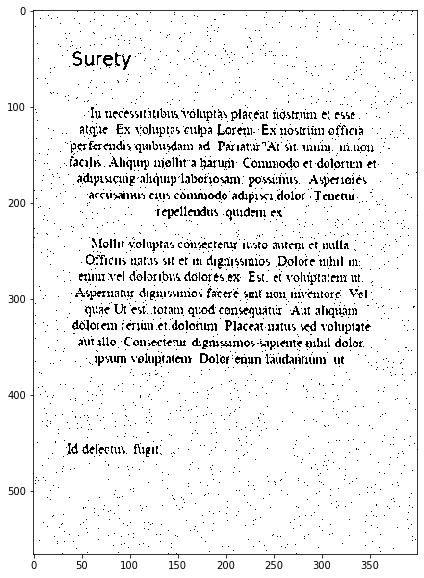

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(images[0])

In [19]:
def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    data_final = []
    data_final = np.zeros((len(data),len(data[0])))
    for i in range(len(data)):

        for j in range(len(data[0])):

            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final

In [37]:
for i in range(3):
    images[0,:,:,i]=median_filter(images[0,:,:,i],3)

TypeError: list indices must be integers or slices, not tuple

In [48]:
print(images[0].shape)

(566, 400, 3)


In [61]:
grayscale = cv2.cvtColor(images[0], cv2.COLOR_BGR2GRAY)
img=images[0]
g2 = np.dot(img[...,:3], [0.299, 0.587, 0.114])

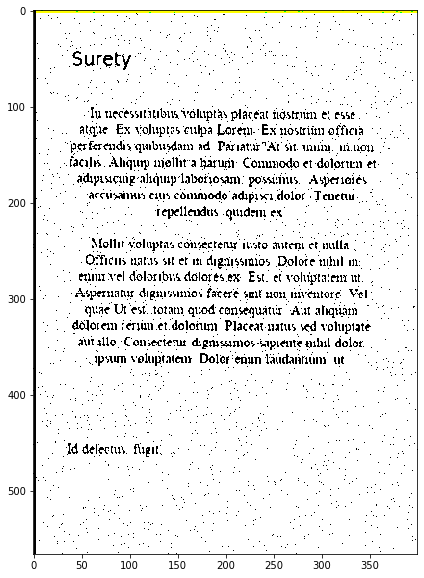

In [62]:
plt.figure(figsize=(10,10))
plt.imshow(img)

In [58]:
img1 = median_filter(g2,3)
img1.shape

(566, 400)

In [63]:
images[0][:,:,0].shape

(566, 400)

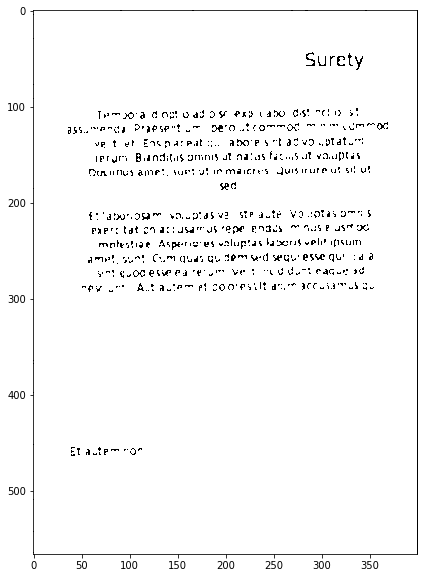

In [81]:
img=images[300].copy()
for i in range(3):
    img[:,:,i]=median_filter(img[:,:,i],2)
plt.figure(figsize=(10,10))
plt.imshow(img)

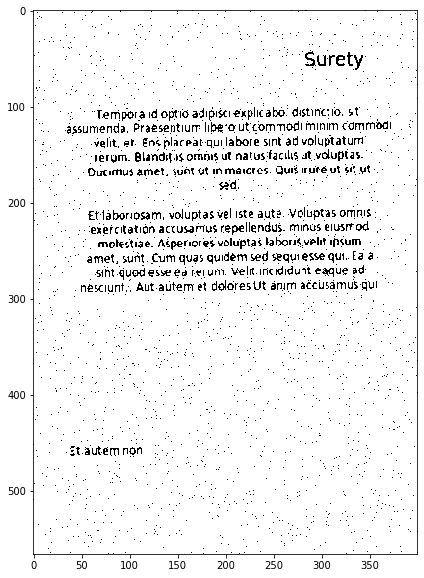

In [79]:
plt.figure(figsize=(10,10))
plt.imshow(images[300])

### Median Filter :
####  The median filter managed to remove the salt and pepper noise but it also caused damage to the text integrity which is not acceptable, it was probably due to the small font size of the documents

In [90]:
import random
def add_noise(img):
    row , col, z = img.shape
    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):
        y_coord=random.randint(0, row - 1)
        x_coord=random.randint(0, col - 1)
        img[y_coord][x_coord] = 255
    number_of_pixels = random.randint(300 , 10000)
    for i in range(number_of_pixels):
        y_coord=random.randint(0, row - 1)
        x_coord=random.randint(0, col - 1)
        img[y_coord][x_coord] = 0
    return img

In [99]:
img2 = cv2.imread('./document_dataset/train/104.png')

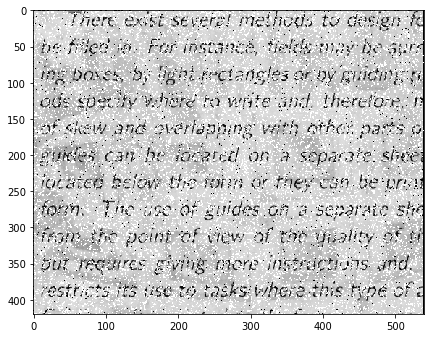

In [105]:
plt.figure(figsize=(7,7))
plt.imshow(add_noise(img2))
img2_noise=add_noise(img2)
# Too much noise has been added noise function was run on the image 5 times

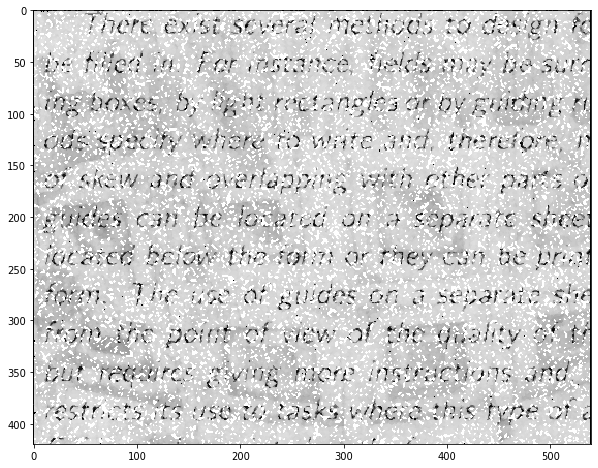

In [106]:
for i in range(3):
    img2[:,:,i]=median_filter(img2[:,:,i],2)
plt.figure(figsize=(10,10))
plt.imshow(img2)

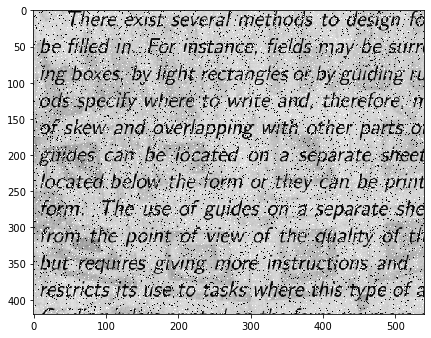

In [109]:
img2 = cv2.imread('./document_dataset/train/104.png')
plt.figure(figsize=(7,7))
plt.imshow(add_noise(img2))
img2_noise=add_noise(img2)
# The noise function has been run the below image 2 times

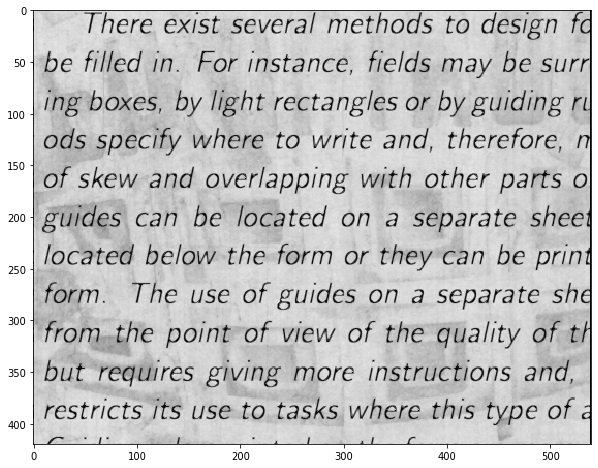

In [110]:
img5 = cv2.imread('./document_dataset/train/104.png')
for i in range(3):
    img5[:,:,i]=median_filter(img5[:,:,i],2)
plt.figure(figsize=(10,10))
plt.imshow(img5)
# Median filter was applied only on the image without any salt and pepper noise.

#### The median filter can now be added in the pipeline will be used before sending into the autoencoder-decoder for background denoising. The below functions be added directly to the pipeline. The function do salt_pepper_denoise() will return the final answer.

In [111]:
def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    data_final = []
    data_final = np.zeros((len(data),len(data[0])))
    for i in range(len(data)):

        for j in range(len(data[0])):

            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final
def salt_pepper_denoise(img,filter_size):
    for i in range(3):
        img[:,:,i]=median_filter(img[:,:,i],2)
    return img